基于lmList[1]中获取各指标对应的线性模型，对未来30期的数据进行预测，并与验证数据集进行比较分析

In [1]:
import numpy as np
import pickle

with open('data/aicList.pkl', 'rb') as f:
    aicList = pickle.load(f)
    
with open('data/data.pkl', 'rb') as f:
    data = pickle.load(f)
    
with open('data/subdata_diff1.pkl', 'rb') as f:
    subdata_diff1 = pickle.load(f)
    
with open('data/lmList.pkl', 'rb') as f:
    lmList = pickle.load(f)
    
p = np.argmin(aicList)+1
rows, cols = subdata_diff1.shape
n = rows
preddf = None
for i in range(30):
    predData = list(subdata_diff1[n+i-p:n+i].flatten())
    predVals = np.matmul([1]+predData,lmList[p-1])
    # 使用逆差分运算，还原预测值
    predVals=data.iloc[n+i,:].values[:4]+predVals
    if preddf is None:
        preddf = [predVals]
    else:
        preddf = np.r_[preddf, [predVals]]
    # 为subdata_diff1增加一条新记录
    subdata_diff1 = np.r_[subdata_diff1, [data.iloc[n+i+1,:].values[:4] - data.iloc[n+i,:].values[:4]]]
    
#分析预测残差情况
(np.abs(preddf - data.iloc[-30:data.shape[0],:4])/data.iloc[-30:data.shape[0],:4]).describe()

,High,Low,Open,Close
count,30.000000,30.000000,30.000000,30.000000
mean,0.010060,0.009380,0.005661,0.013739
std,0.008562,0.009968,0.006515,0.013674
min,0.001458,0.000115,0.000114,0.000130
25%,0.004146,0.001950,0.001653,0.002785
50%,0.007166,0.007118,0.002913,0.010414
75%,0.014652,0.012999,0.006933,0.022305
max,0.039191,0.045802,0.024576,0.052800


绘制二维图表观察预测数据与真实数据的逼近情况

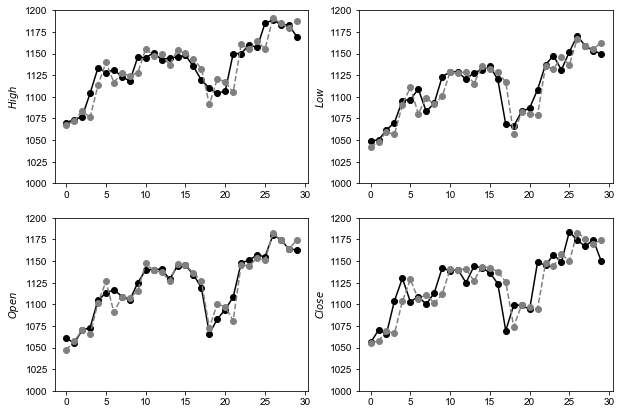

Evaluation on test data: accuracy = 99.03% 



In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'

plt.figure(figsize=(10,7))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(range(30),data.iloc[-30:data.shape[0],i].values,'o-',c='black')
    plt.plot(range(30),preddf[:,i],'o--',c='gray')
    plt.ylim(1000,1200)
    plt.ylabel("$"+data.columns[i]+"$")
plt.show()
v = 100*(1 - np.sum(np.abs(preddf - data.iloc[-30:data.shape[0],:4]).values)/np.sum(data.iloc[-30:data.shape[0],:4].values))
print("Evaluation on test data: accuracy = %0.2f%% \n" % v)